# EXPLORATORY DATA ANALYSYS OF HABERMAN DATASET

# Objective:
Classify weather a patient is a will survive for 5 or more years or less than 5 years after the surgery of the Breast Cancer on the basis of provided features(age, year(year of surgery), nodes).

In [1]:
#Importing the libraries to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the data set
haberman = pd.read_csv('haberman.csv')

#Looking at the dimensions of the dataset
print(haberman.shape)


(306, 4)


In [3]:
#Check the column names
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


# Information about the Haberman's Attribute
1)age :- This is the age of the patient in which they undergone surgery.

2)year :- This is the Year in which the patient undergone surgery.

3)nodes :-  Lymph nodes are small, bean-shaped organs that act as filters along the lymph fluid channels. As lymph fluid               leaves the breast and eventually goes back into the bloodstream, the lymph nodes try to catch and trap cancer             cells before they reach other parts of the body. Having cancer cells in the lymph nodes under your arm                     suggests an increased risk of the cancer spreading.In our data it is axillary nodes detected(0–52)
            (Source :-  https://www.breastcancer.org/symptoms/diagnosis/lymph_nodes)

4)status :- It represent whether patient survive more than 5 years or less after undergone through surgery.Here if                     patients survived 5 years or more it is represented as 1 and patients who survived less than 5 years is
            represented as 2.

In [4]:
#Printing first 20 rows to get a glimpse of the dataset
haberman.head(20)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [5]:
def status_change(argument):
    if argument == 1:
        return 'survived_5_years_or_more'
    else:
        return 'survived_less_than_5_years'

In [6]:
#Changing the status column(Class Label) to meaningfull name
haberman.status = haberman.status.map(status_change)

In [7]:
haberman.head(10)

,age,year,nodes,status
0,30,64,1,survived_5_years_or_more
1,30,62,3,survived_5_years_or_more
2,30,65,0,survived_5_years_or_more
3,31,59,2,survived_5_years_or_more
4,31,65,4,survived_5_years_or_more
5,33,58,10,survived_5_years_or_more
6,33,60,0,survived_5_years_or_more
7,34,59,0,survived_less_than_5_years
8,34,66,9,survived_less_than_5_years
9,34,58,30,survived_5_years_or_more


In [8]:
#Data points for class '1' and class '2' are present in status
haberman['status'].value_counts()

survived_5_years_or_more      225
survived_less_than_5_years     81
Name: status, dtype: int64

# Observations:
1)There are 306 instances(rows) and 4 attributes(variables or columns) are present in Haberman's data.

2)There are 3 feature variable(independent variable) 'age', 'year', 'nodes' and 1 class attribute(Dependent variable)       status.

3)There are 225 women's who survived 5 years or more after the surgery and 81 women's who survived less than 5 years.

# 2-D Scatter Plot (Bi-Variate Analysis)


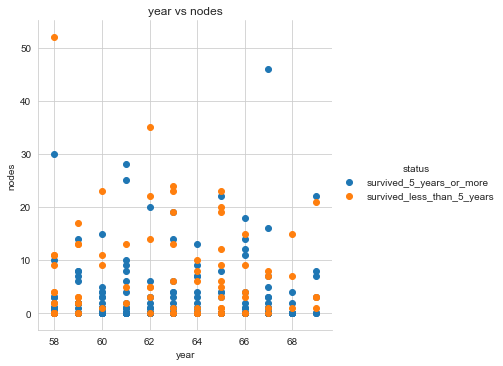

In [15]:
#Scatter Plot between age and nodes and adding status as legend
sns.set_style('whitegrid');
sns.FacetGrid(haberman, hue = 'status', size = 5)\
   .map(plt.scatter, 'year', 'nodes')\
   .add_legend();
plt.title('year vs nodes')
plt.show();
#There is nothing to say here as yellow and blue points are mostly overlapped

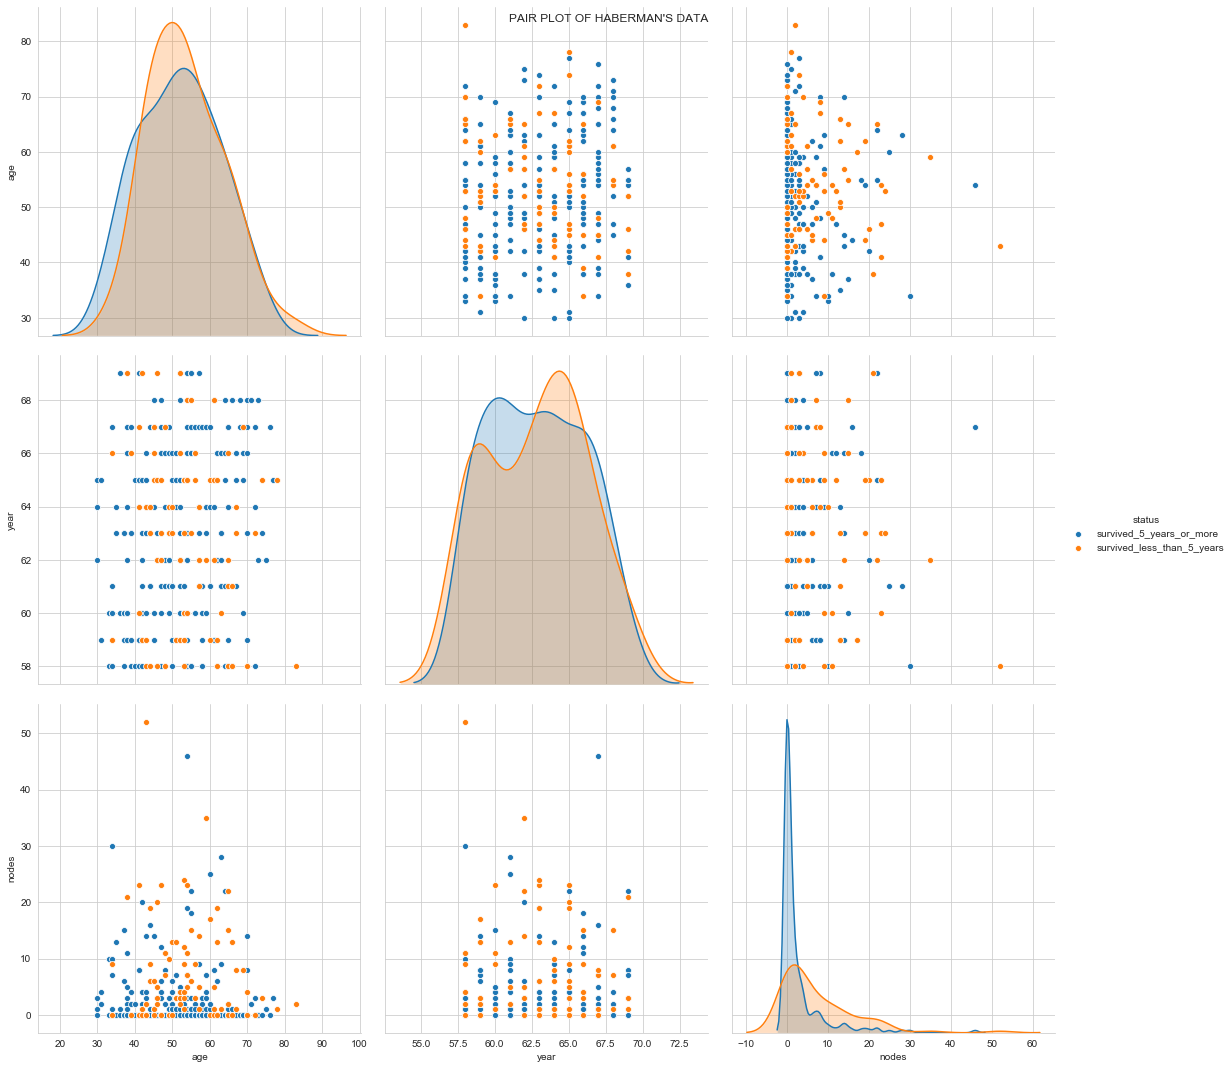

In [16]:
#Let's try pair plot
plt.close();
sns.set_style('whitegrid');
sns.pairplot(haberman, hue = 'status', size = 5)
plt.suptitle("PAIR PLOT OF HABERMAN'S DATA" )
plt.show();

# Observations
1)Plot 2 :- (year on x-axis and age on y-axis).Rejecting this plot as data points are mostly overlapped.

2)plot 4 :- It is a mirror image of Plot - 2 So, Rejecting this as well.

3)Plot 6 :- (nodes on x-axis and year on y-axis).There is huge overlapping So, I am rejecting this also.

4)Plot 8 :- It is a mirror image of Plot - 6 So, Rejecting this as well.

5)Plot 3 :- (nodes on x-axis and age on y-axis).There is overlapping of data points but less than others.So I am accepting             this and moving on whith it's features i.e ('age' and 'nodes').

6)Plot 7 :- It is a mirror image of Plot - 3 So, Accepting this as well.

By this pair plots we can see the most important features are "age" and "nodes".

# Univariate Analysis

In [21]:
haberman_long_survivor = haberman[haberman['status']== 'survived_5_years_or_more']
haberman_short_survivor = haberman[haberman['status']== 'survived_less_than_5_years']

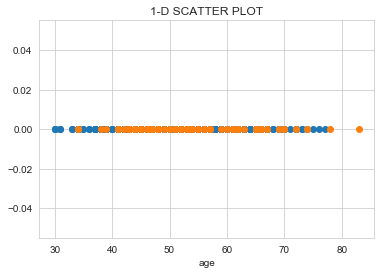

In [29]:
#1-D scatter plot using only one feature
sns.set_style('whitegrid');
plt.plot(haberman_long_survivor.age, np.zeros_like(haberman_long_survivor.age), 'o')
plt.plot(haberman_short_survivor.age, np.zeros_like(haberman_short_survivor.age), 'o')
plt.xlabel('age')
plt.title('1-D SCATTER PLOT')
plt.show();

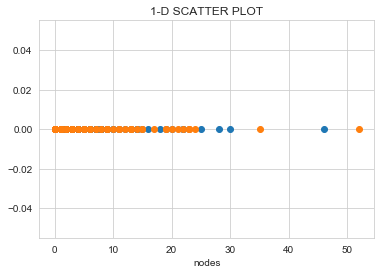

In [33]:
sns.set_style('whitegrid');
plt.plot(haberman_long_survivor.nodes, np.zeros_like(haberman_long_survivor.nodes), 'o')
plt.plot(haberman_short_survivor.nodes, np.zeros_like(haberman_short_survivor.nodes), 'o')
plt.xlabel('nodes')
plt.title('1-D SCATTER PLOT')
plt.show();

# Observations:
1)By Drawing 1-D scatter plot we can see there is huge overlap between the data points,So there is nothing much to say       here.

2)I am moving towards Histograms, PDF & CDF for better clarification of feature's impact on status.

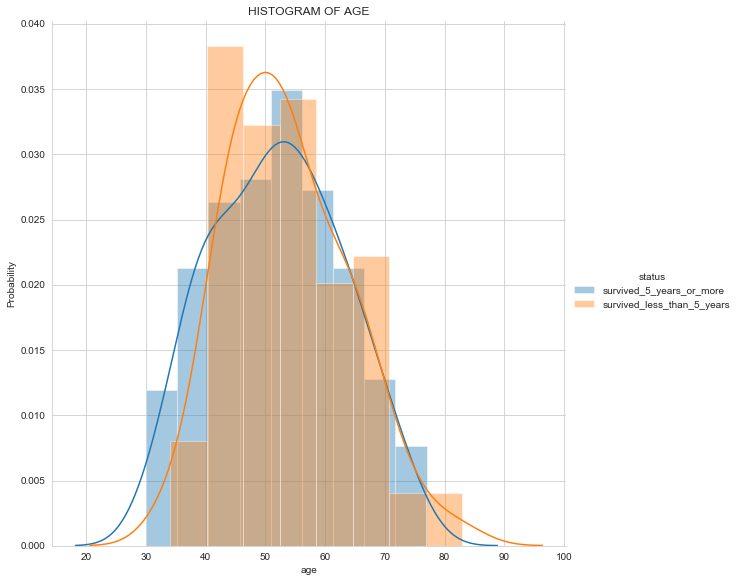

In [34]:
#Histograms
sns.FacetGrid(haberman, hue = 'status', size = 8)\
   .map(sns.distplot, 'age')\
   .add_legend()
plt.ylabel('Probability')
plt.title('HISTOGRAM OF AGE');
plt.show();

# Observation
1)As we can see status is highly overlapped for age ranging from 35 to 75 So we can not say anything here.

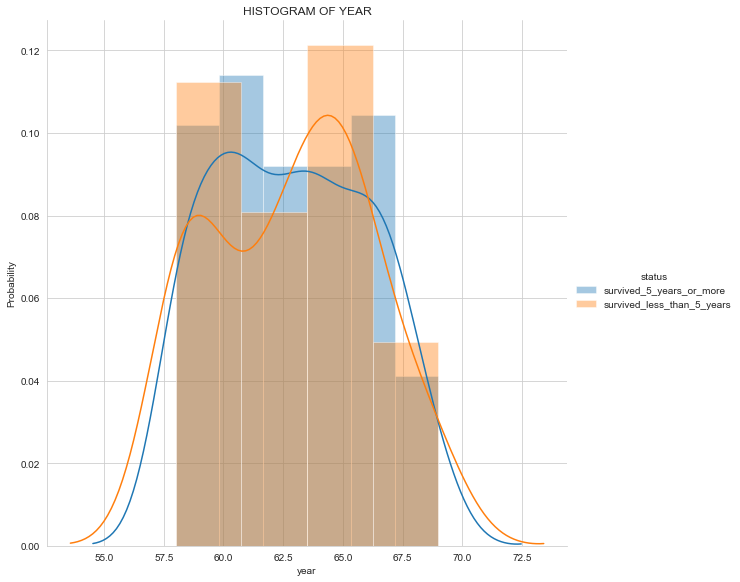

In [35]:
sns.FacetGrid(haberman, hue = 'status', size = 8)\
   .map(sns.distplot, 'year')\
   .add_legend();
plt.ylabel('Probability')
plt.title('HISTOGRAM OF YEAR');
plt.show();

# Observation
1)Here also we can not predict anything as both the status are highly overlapped.

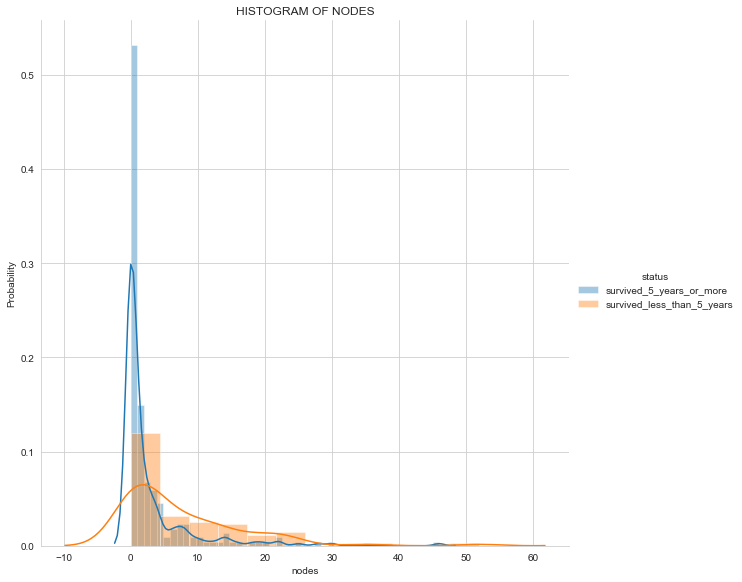

In [36]:
sns.FacetGrid(haberman, hue = 'status', size = 8)\
   .map(sns.distplot, 'nodes')\
   .add_legend()
plt.ylabel('Probability')
plt.title('HISTOGRAM OF NODES');
plt.show();

# Observation
1)Here as we can observe by PDF's of both the status differ So, we can take this into account.

2)So, if the nodes value is less than or nearer to 0 and nodes is less than equal to 4 then the status is 'survived_5_years_or_more' and if it is greater than 4 then the status is survived_less_than_5_years.

   if nodes <=0 
   status = survived_5_years_or_more
   else if (nodes >0 && nodes <=4)
   status = survived_5_years_or_more
   else
   status = survived_less_than_5_years

# Calculating & Plotting PDF & CDF

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]


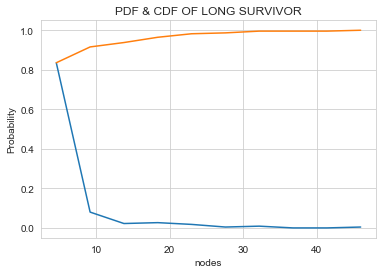

In [38]:
counts, bin_edges = np.histogram(haberman_long_survivor.nodes, bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
print(pdf)
print(cdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('nodes')
plt.ylabel('Probability')
plt.title('PDF & CDF OF LONG SURVIVOR')
plt.show();

# Observation
1)As we can see when the nodes<= 5 the chances of long survival is almost 85%(from orange line i.e:-CDF).

2)As the nodes gets increases the chances of long survival is decreasing.

3)Almost 100% of people have very less chances of long survival as nodes>=40. 

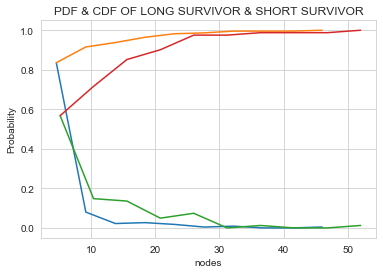

In [39]:
counts,bin_edges = np.histogram(haberman_long_survivor['nodes'], bins = 10, density = True)
PDF = counts/sum(counts)
CDF = np.cumsum(PDF)
plt.plot(bin_edges[1:], PDF)
plt.plot(bin_edges[1:], CDF)

counts,bin_edges = np.histogram(haberman_short_survivor['nodes'], bins = 10, density = True)
PDF = counts/sum(counts)
CDF = np.cumsum(PDF)
plt.plot(bin_edges[1:], PDF)
plt.plot(bin_edges[1:], CDF)
plt.xlabel('nodes')
plt.ylabel('Probability')
plt.title('PDF & CDF OF LONG SURVIVOR & SHORT SURVIVOR')
plt.show();

# Observation
1)The CDF(yellow line) for long survival(status = survived_5_years_or_more) is same as we seen above.

2)The CDF of short survival is represented by Red Line.

3)We can see that there are almost 58% of people with nodes<=5 have chances of living 5 years or less after surgery.

4)As number of nodes increases the chance of survival decreases.

5)As nodes>40 nearly 100% chance of short survival.

# Calculating Mean, Median, std-dev, Median-Absolute deviation, Quantiles for long_survivor and short_survivor

In [53]:
print('\nMean value of nodes for Long Survivor:')
print(np.mean(haberman_long_survivor.nodes))
print('\nMean value of nodes for Long Survivor:')
print(np.mean(haberman_short_survivor.nodes))


Mean value of nodes for Long Survivor:
2.7911111111111113

Mean value of nodes for Long Survivor:
7.45679012345679


In [54]:
print('\nStandard Deviation value of nodes for Long Survivor:')
print(np.std(haberman_long_survivor.nodes))
print('\nStandard Deviation value of nodes for Long Survivor:')
print(np.std(haberman_short_survivor.nodes))


Standard Deviation value of nodes for Long Survivor:
5.857258449412131

Standard Deviation value of nodes for Long Survivor:
9.128776076761632


# Observation:
1)As we can see the mean value of nodes detected of long survivor is 2.79111 which is obvious for long survivor.As the       mean suggest there will be less nodes detected for long survivors.

2)Spread of nodes detected for long survivor is 5.85725 i.e most of the nodes detected for long survivor is     
  between (2.79111 - 5.85725, 2.79111 - 5.85725).
  
3)As we can see the mean value of nodes detected of short survivor is 7.456790 which is obvious for short survivor.As the   mean suggest there will be more nodes detected for short survivors.

4)Spread of nodes detected for short survivor is 9.12877 i.e most of the nodes detected for long survivor is     
  between (7.456790 - 9.12877, 7.456790 - 9.12877).
  
We can say by looking at the means and std-dev for both long and short survivors that short-survivor's have much more higher mean value of nodes detected and also they have much more higher spread of nodes detected than the long survivors mean and std-dev.

In [55]:
#As mean is much affected by the outliers we can move towards median and Median-Absolute Deviation
print('\nMedian value of nodes for Long Survivor:')
print(np.median(haberman_long_survivor.nodes))
print('\nMedian value of nodes for Long Survivor:')
print(np.median(haberman_short_survivor.nodes))


Median value of nodes for Long Survivor:
0.0

Median value of nodes for Long Survivor:
4.0


In [56]:
from statsmodels import robust
print('\nMedian-Absolute Deviation value of nodes for Long Survivor:')
print(robust.mad(haberman_long_survivor.nodes))
print('\nMedian-Absolute Deviation value of nodes for Long Survivor:')
print(robust.mad(haberman_short_survivor.nodes))


Median-Absolute Deviation value of nodes for Long Survivor:
0.0

Median-Absolute Deviation value of nodes for Long Survivor:
5.930408874022408


# Observation:
1)The median values of nodes detected for long survivor is 0 and for short survivor it is 4, So the patients who has         average 0 nodes has long survival chances and patients who have average 4 nodes have short survival chances.


In [64]:
#Quantiles, 90th percentile 
print('\nQuantile value of nodes for Long Survivor:')
print(np.percentile(haberman_long_survivor.nodes, np.arange(0, 100, 25)))
print('\nQuantile value of nodes for Long Survivor:')
print(np.percentile(haberman_short_survivor.nodes, np.arange(0, 100, 25)))
print('\n90th percentile value of nodes for Long Survivor:')
print(np.percentile(haberman_long_survivor.nodes, 90))
print('\n90th percentile value of nodes for Long Survivor:')
print(np.percentile(haberman_short_survivor.nodes, 90))


Quantile value of nodes for Long Survivor:
[0. 0. 0. 3.]

Quantile value of nodes for Long Survivor:
[ 0.  1.  4. 11.]

90th percentile value of nodes for Long Survivor:
8.0

90th percentile value of nodes for Long Survivor:
20.0


# Box-Plot 

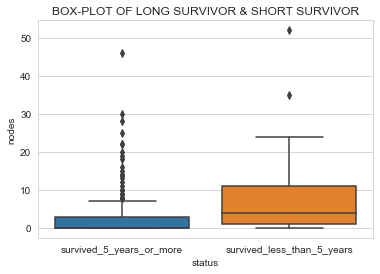

In [40]:
sns.boxplot(x = 'status', y = 'nodes', data = haberman)
plt.title('BOX-PLOT OF LONG SURVIVOR & SHORT SURVIVOR');
plt.show();

# Violin-Plot

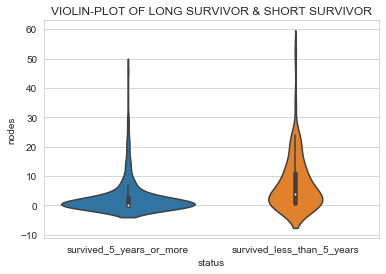

In [43]:
sns.violinplot(x = 'status', y = 'nodes', data = haberman)
plt.title('VIOLIN-PLOT OF LONG SURVIVOR & SHORT SURVIVOR');
plt.show();

# Observation:
1)From the box-plot we can see the 25th and 50th percentile of number of nodes detected for long_survivor    (survived_5_years_or_more) is same and nearly 0, also the range for number of nodes detected for long survivor is between (0-8) and most of the nodes are between (0-3) i.e the 25th to 75th percentile range.

2)From the box-plot we can also see that the range for number of nodes detected for short survivor is between (0-24) and most of the nodes are between (1-11) i.e the 25th to 75th percentile range.

3)From the violin plot we can see that for long survivor density it is more near the 0 nodes and for short survivor density is more between (0-13).